# **Digit Recognition**

Dataset from MNIST containing 60000 training samples and 10000 testing samples

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
mnist = tf.keras.datasets.mnist # Handwritten number 0-9 with 28x28 size of image

In [3]:
# Unpack the dataset into train and test datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

AxesImage(54,36;334.8x217.44)


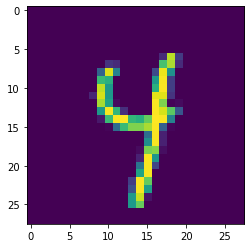

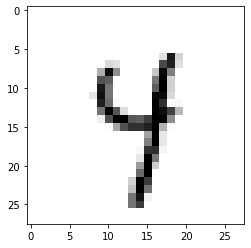

In [5]:
print(plt.imshow(x_train[26]))
plt.show()
plt.imshow(x_train[26], cmap=plt.cm.binary)

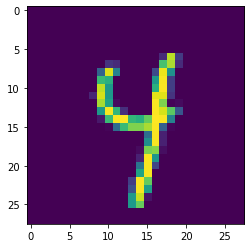

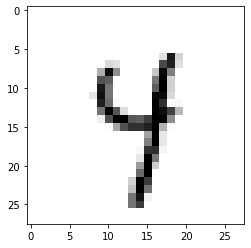

In [6]:
# x_train = tf.keras.utils.normalize(x_train, axis=1)
x_train = x_train/255
plt.imshow(x_train[26])
plt.show()
plt.imshow(x_train[26], cmap=plt.cm.binary)

In [7]:
x_trainr = np.array(x_train).reshape(-1, 28, 28, 1)
x_testr = np.array(x_test).reshape(-1, 28, 28, 1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [10]:
layer = model.layers #Conv layers at 1, 3, 6, 8, 11, 13, 15
filters, biases = model.layers[0].get_weights()
print(layer[0].name, filters.shape)

conv2d (3, 3, 1, 64)


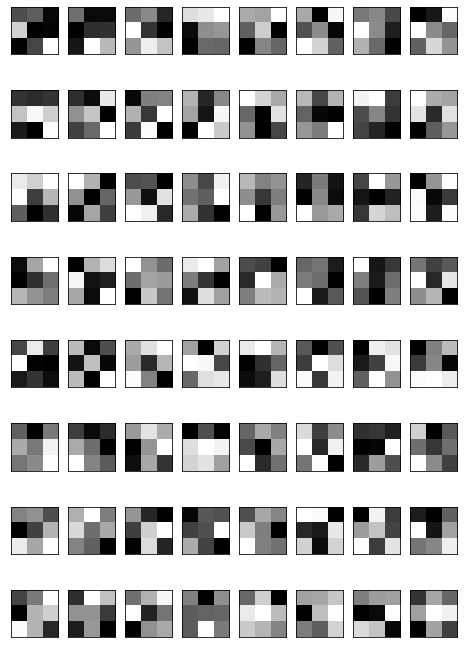

In [11]:
# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()

In [12]:
#### Now plot filter outputs    

#Define a new truncated model to only include the conv layers of interest
#conv_layer_index = [0, 3 , 6]
conv_layer_index = [0, 3, 6]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                             

In [13]:
# gambar
img = x_test[99]
print(img.shape)

imgs = np.expand_dims(img, axis=0)
print(imgs.shape)

(28, 28)
(1, 28, 28)


In [14]:
# Generate feature output by predicting on the input image
feature_output = model_short.predict(imgs)

1/1 [==============================] - 3s 3s/step


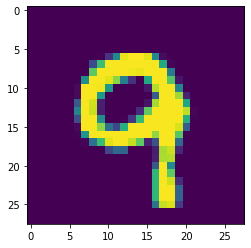

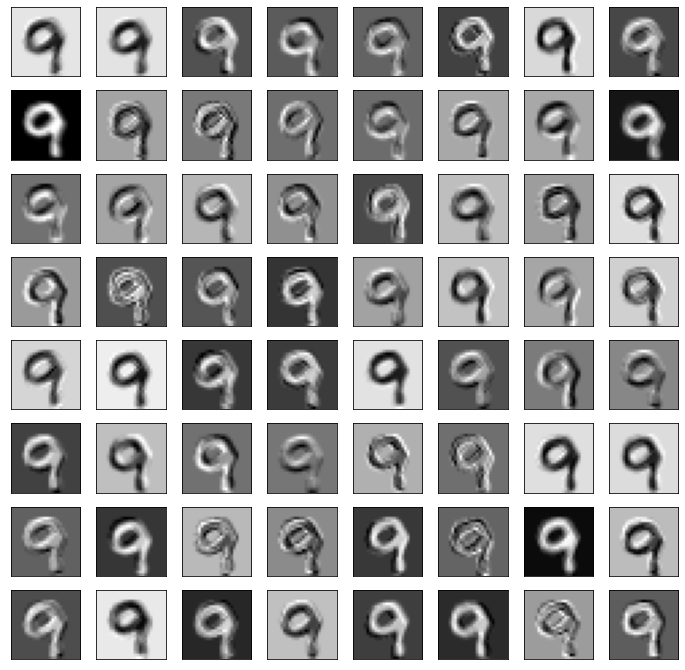

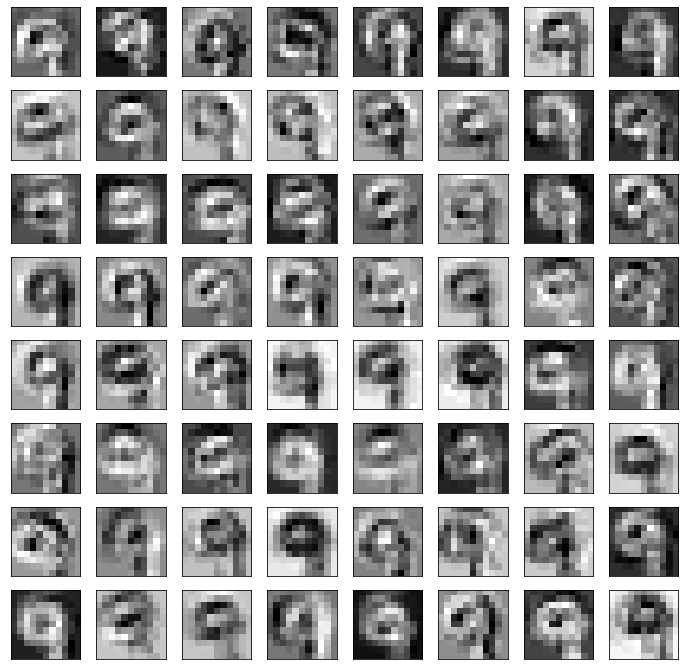

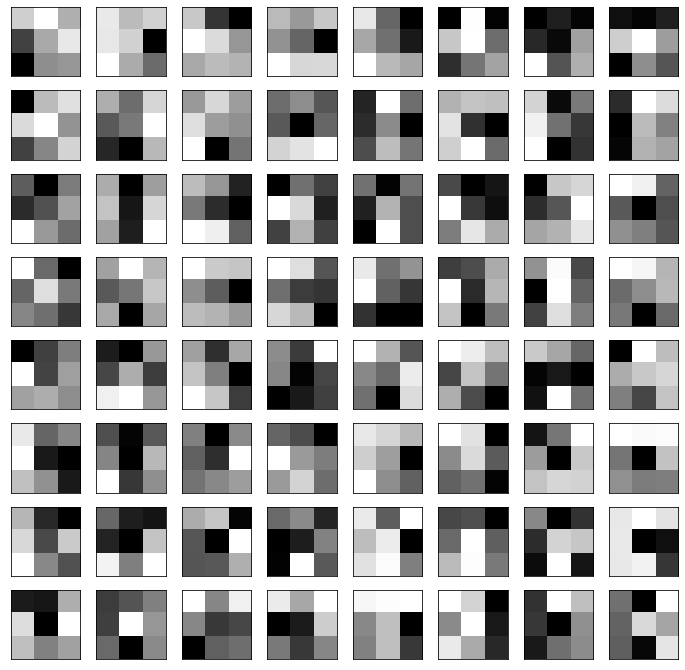

In [15]:
columns = 8
rows = 8
plt.imshow(img)
plt.show()
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()

In [16]:
feature_extractor = Model(
    inputs=model.inputs,
    outputs=[layer.output for layer in model.layers],
)
x = tf.ones((1 , 28, 28, 1))
features = feature_extractor(x)

In [17]:
feature_extractor = Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="conv2d").output,
)
x = tf.ones((1,28,28,1))
features = feature_extractor(x)

In [18]:
print(features[0])

tf.Tensor(
[[[-0.3665771  -0.36878514  0.13743722 ...  0.22773767 -0.03059518
    0.08095629]
  [-0.3665771  -0.36878514  0.13743722 ...  0.22773767 -0.03059518
    0.08095629]
  [-0.3665771  -0.36878514  0.13743722 ...  0.22773767 -0.03059518
    0.08095629]
  ...
  [-0.3665771  -0.36878514  0.13743722 ...  0.22773767 -0.03059518
    0.08095629]
  [-0.3665771  -0.36878514  0.13743722 ...  0.22773767 -0.03059518
    0.08095629]
  [-0.3665771  -0.36878514  0.13743722 ...  0.22773767 -0.03059518
    0.08095629]]

 [[-0.3665771  -0.36878514  0.13743722 ...  0.22773767 -0.03059518
    0.08095629]
  [-0.3665771  -0.36878514  0.13743722 ...  0.22773767 -0.03059518
    0.08095629]
  [-0.3665771  -0.36878514  0.13743722 ...  0.22773767 -0.03059518
    0.08095629]
  ...
  [-0.3665771  -0.36878514  0.13743722 ...  0.22773767 -0.03059518
    0.08095629]
  [-0.3665771  -0.36878514  0.13743722 ...  0.22773767 -0.03059518
    0.08095629]
  [-0.3665771  -0.36878514  0.13743722 ...  0.22773767 -0.0305

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(x_trainr,y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 8s 5ms/step - loss: 0.2900 - accuracy: 0.9064 - val_loss: 0.1210 - val_accuracy: 0.9626
Epoch 2/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0912 - accuracy: 0.9713 - val_loss: 0.0766 - val_accuracy: 0.9759
Epoch 3/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0685 - accuracy: 0.9794 - val_loss: 0.0654 - val_accuracy: 0.9811
Epoch 4/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0547 - accuracy: 0.9832 - val_loss: 0.0974 - val_accuracy: 0.9705
Epoch 5/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0600 - val_accuracy: 0.9814


In [21]:
test_loss,test_acc = model.evaluate(x_testr, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 21.3014 - accuracy: 0.9662
21.30141258239746
0.9661999940872192


In [22]:
prediction = model.predict(x_testr)

313/313 [==============================] - 2s 4ms/step


5


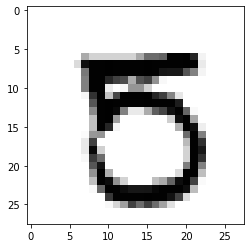

In [34]:
# Selecting an image from data test and predict it's value
from random import randint
r=randint(0,9999)
plt.imshow(x_test[r], cmap=plt.cm.binary)
print(np.argmax(prediction[r]))

# **Predict your own handwritten digit**



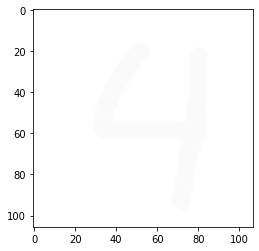

In [35]:
# take the image from your local
img = cv2.imread('4.png')
plt.imshow(img)

In [36]:
img.shape

(106, 107, 3)

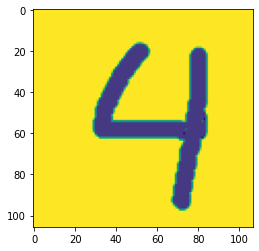

In [37]:
# RGB to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
plt.imshow(gray)

In [38]:
# Reshape the image to be the same size as the required input which is 28x28
resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)
resized.shape

(28, 28)

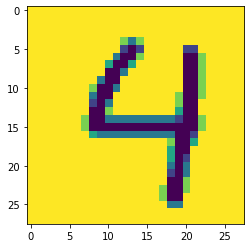

In [39]:
# Now the data has the same dimension as the required input
plt.imshow(resized)

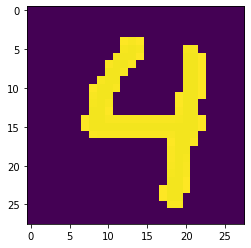

In [40]:
# because the training model using black background then we need to make it black as well
# this model is not working well if the background color is diverse or not solid
count = [0 for i in range(256)]
hold=[]
i=0
j=0
for i in range (28):
  for j in range (28):
    hold.append(resized[i][j])

for i in range(256):
  count[i] = hold.count(i)

max = np.max(count)

for i in range(256):
  if count[i] == max:
    index = i

for i in range (28):
  for j in range (28):
    if (resized[i][j] == index):
      resized[i][j] = 0
    elif resized[i][j] <128:
      resized[i][j] = 255 - resized[i][j]

plt.imshow(resized)

In [41]:
# Next step is to normalize
norm_img = resized/255
# norm_img = tf.keras.utils.normalize(resized, axis=1) # can also use this

In [42]:
# Reshape into higher dimension
rdy_img = np.array(norm_img).reshape(-1, 28, 28, 1)
rdy_img.shape

(1, 28, 28, 1)

1/1 [==============================] - 0s 18ms/step
4


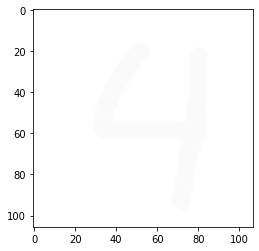

In [43]:
# finally we can predict the number using the pre trained model above
prediction_img = model.predict(rdy_img)
plt.imshow(img)
print(np.argmax(prediction_img))